In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv('df.csv')
df.head(5)

,Unnamed: 0,age,marital,education,default,balance,housing,loan,day,campaign,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,58,1.0,3.0,0,2143,1,0,5,1,...,0,0,1,0,0,0,0,0,0,1
1,1,44,0.0,2.0,0,29,1,0,5,1,...,0,0,1,0,0,0,0,0,0,1
2,2,33,1.0,2.0,0,2,1,1,5,1,...,0,0,1,0,0,0,0,0,0,1
3,3,47,1.0,0.0,0,1506,1,0,5,1,...,0,0,1,0,0,0,0,0,0,1
4,4,33,0.0,0.0,0,1,0,0,5,1,...,0,0,1,0,0,0,0,0,0,1


In [3]:
X = df.drop('y', axis=1)
y = df['y']

y = pd.DataFrame(y).reset_index(drop=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = pd.DataFrame(X_train).reset_index(drop=True)
X_test = pd.DataFrame(X_test).reset_index(drop=True)
y_train2 = y_train.reset_index(drop=True)
y_test2 = y_test.reset_index(drop=True)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test2], axis=1)

In [4]:
from sklearn.naive_bayes import GaussianNB

In [5]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [6]:
y_pred=gnb.predict(X_test)

conf = confusion_matrix(y_test, y_pred)
class_labels = ['0', '1']
conf_matrix = pd.DataFrame(conf, index=class_labels)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
col=['Accuracy', 'Recall', 'Precision']
metric_df = pd.DataFrame(col,[accuracy, recall, precision]).reset_index()

In [7]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.816874930885768
Precision: 0.30313588850174217
Recall: 0.3987167736021998
Confusion Matrix:
      0     1
0  6952  1000
1   656   435


In [8]:
print(classification_report(y_test,
                            y_pred,
                            target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      7952
           1       0.30      0.40      0.34      1091

    accuracy                           0.82      9043
   macro avg       0.61      0.64      0.62      9043
weighted avg       0.84      0.82      0.83      9043



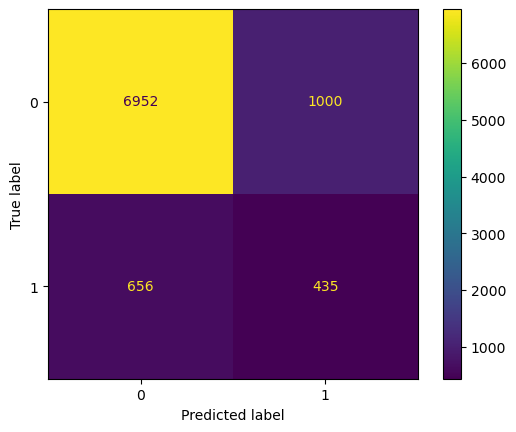

In [9]:
cm = confusion_matrix(y_test, 
                      y_pred, 
                      labels=gnb.classes_
                     )

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=('0','1')
                             )

disp.plot();

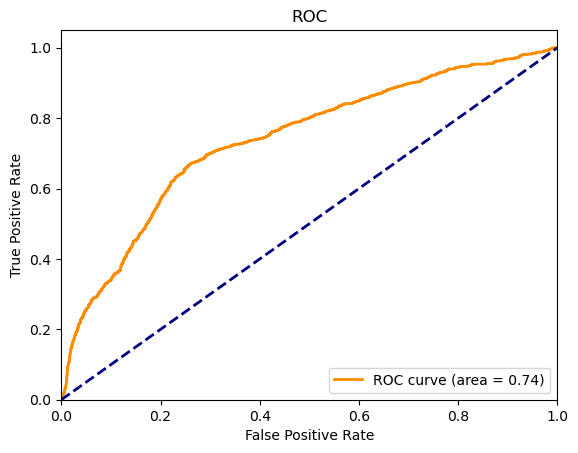

In [10]:
y_scores = gnb.predict_proba(X_test)[:, 1] 
 
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
 
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()